<a href="https://colab.research.google.com/github/peterjsadowski/ics235/blob/master/hw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 1: K-Nearest Neighbors

Due: Sept 11th. Upload code and answers to Laulima.

In this homework you will implement the K-Nearest Neighbors algorithm on the Iris data set from the famous statistician R.A. Fischer. This is essentially the "Hello world!" of machine learning. The input data $X$ is given by a $N$-by-$D$ matrix, where $N$ is the number of examples and $D$ is the number of input features. The targets are given by a $N$-length sequence of classes, $Y$. More information on the data set can be found at  https://archive.ics.uci.edu/ml/datasets/Iris.


First, we need to download the data. The following code uses the urllib library to request data from a website. The pandas library is a powerful library for data analysis --- we use the read_csv method to automatically parse the comma seperated variable (csv) file.

In [292]:
import pandas as pd
import urllib.request  
import numpy as np  # Numerical python.
import random as rd

# Download the data and load it into a Pandas data frame.
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
response = urllib.request.urlopen(url)
dataset = pd.read_csv(response, header=None).sample(frac=1)
dataset = dataset.reset_index(drop=True)

# Set the column names.
names = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class']
dataset.columns = names

# Tells pandas that this is a categorical feature.
dataset['class'] = pd.Categorical(dataset['class']) 
print("Dataset shape: ", dataset.shape)
dataset.head() # Prints first 5 examples from the data set.

Dataset shape:  (150, 5)


,sepal length,sepal width,petal length,petal width,class
0,6.3,3.3,6.0,2.5,Iris-virginica
1,7.1,3.0,5.9,2.1,Iris-virginica
2,6.5,3.0,5.5,1.8,Iris-virginica
3,5.1,3.3,1.7,0.5,Iris-setosa
4,6.7,3.1,4.4,1.4,Iris-versicolor


In [293]:
description = dataset.iloc[0:100, 0:4].describe()
description

,sepal length,sepal width,petal length,petal width
count,100.00000,100.000000,100.000000,100.000000
mean,5.91300,3.069000,3.929000,1.278000
std,0.85501,0.399418,1.782932,0.784648
min,4.30000,2.200000,1.000000,0.100000
25%,5.10000,2.800000,1.600000,0.300000
50%,6.00000,3.050000,4.550000,1.450000
75%,6.50000,3.300000,5.400000,1.900000
max,7.70000,4.200000,6.700000,2.500000


Numpy is a powerful library for mathematical operations on vectors and matrices. Here we convert the pandas data into a 2-dimensional numpy array (a matrix). 

In [294]:
X = np.array(dataset.iloc[:,:4]) # Convert input features into Numpy array.
Y = dataset['class']

# Split into train and test set.
Xtrain = X[0:100, :]
Xtest  = X[100:,:]
Ytrain = Y.iloc[:100]
Ytest = Y.iloc[100:]
print(Xtrain.shape, Xtest.shape)

(100, 4) (50, 4)


In [295]:
pd.DataFrame(Xtrain)

,0,1,2,3
0,6.3,3.3,6.0,2.5
1,7.1,3.0,5.9,2.1
2,6.5,3.0,5.5,1.8
3,5.1,3.3,1.7,0.5
4,6.7,3.1,4.4,1.4
...,...,...,...,...
95,7.7,2.8,6.7,2.0
96,6.8,2.8,4.8,1.4
97,5.5,4.2,1.4,0.2
98,5.6,2.8,4.9,2.0


You are asked to implement the following functions.

In [296]:
def categorize(Xtrain, Ytrain, K, x):
    distances = np.apply_along_axis(lambda x1: distance(x1, x), 1, Xtrain)
    first_k = np.argpartition(distances, K-1, 0)[:K]
    first_k_categories = Ytrain[first_k]
    counts = first_k_categories.value_counts()
    max_categories = counts[counts == counts.iloc[0]].index.tolist()
    if len(max_categories) == 1:
        return max_categories[0]
    return Ytrain[first_k[distances[first_k][first_k_categories.isin(max_categories)].argmin()]]

def knn(Xtrain, Ytrain, Xtest, K):
    ''' Implements K-Nearest Neighbor algorithm.
    Inputs
        Xtrain: NxD matrix of features.
        Ytrain: Sequence of class labels.
        Xtest:  Matrix of features for test points.
        K: Number of neighbors to consider.
    
    Returns
        Ytest: Sequence of predicted class labels for test examples.
    ''' 
    # WRITE ME
    y_predicted = np.apply_along_axis(lambda x: categorize(Xtrain, Ytrain, K, x), 1, Xtest) 
    return y_predicted
  
def distance(x1, x2):
    ''' Compute distance between two vectors.
    Inputs
        x1: numpy vector
        x2: numpy vector 
    
    Returns
        distance: real value
    '''
    assert(len(x1) == len(x2))
    return np.linalg.norm(x1-x2)
    # WRITE ME 
  
def accuracy(y_true, y_predicted):
    ''' Calculates the fraction of correct predictions.
    '''
    # WRITE ME
    assert(len(y_true) == len(y_predicted))
    correct_predictions = y_true == y_predicted
    return correct_predictions.sum() / len(correct_predictions)
      

Jupyter notebooks enable us to plot directly in the notebook. We use the pyplot library. 

(4.1092489630922815, 8.108639158574627, 1.8454060311682237, 4.536101237031515)

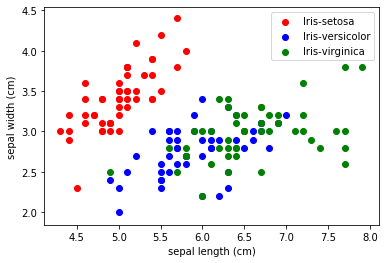

In [297]:
import matplotlib.pyplot as plt
# Plot the points in the first two dimensions.
plt.scatter(X[Y=='Iris-setosa', 0], X[Y=='Iris-setosa', 1], color='red', label='Iris-setosa')
plt.scatter(X[Y=='Iris-versicolor', 0], X[Y=='Iris-versicolor', 1], color='blue', label='Iris-versicolor')
plt.scatter(X[Y=='Iris-virginica', 0], X[Y=='Iris-virginica', 1], color='green', label='Iris-virginica')
plt.legend()
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.axis('tight')

In [298]:
for column in names[:4]:
    dataset[column] = (dataset[column] - description.loc['mean', column])/description.loc['std', column]
dataset.head()

,sepal length,sepal width,petal length,petal width,class
0,0.452626,0.578342,1.161570,1.557386,Iris-virginica
1,1.388289,-0.172752,1.105482,1.047603,Iris-virginica
2,0.686542,-0.172752,0.881133,0.665266,Iris-virginica
3,-0.950867,0.578342,-1.250188,-0.991527,Iris-setosa
4,0.920458,0.077613,0.264172,0.155484,Iris-versicolor


In [299]:
X = np.array(dataset.iloc[:,:4]) # Convert input features into Numpy array.
Y = dataset['class']

# Split into train and test set.
Xtrain = X[0:100, :]
Xtest  = X[100:,:]
Ytrain = Y.iloc[:100]
Ytest = Y.iloc[100:]

In [300]:
accuracy_by_k = [accuracy(Ytest, knn(Xtrain, Ytrain, Xtest, i + 1)) for i in range(100)]
optimal_k = np.asarray(accuracy_by_k).argmax() + 1
optimal_accuracy = accuracy_by_k[optimal_k - 1]
print('Optimal k: {}\nOptimal_accuracy: {}'.format(optimal_k, optimal_accuracy))

Optimal k: 90
Optimal_accuracy: 0.52


(-4.95, 103.95, 0.205, 0.535)

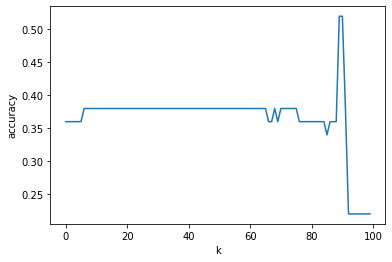

In [301]:
plt.plot(range(100), accuracy_by_k)
plt.xlabel('k')
plt.ylabel('accuracy')
plt.axis('tight')

## To turn in:
1) Implement a function that takes a training set and makes predictions on a test set.

2) Find the best value of K. Split the data into a train and test set. Plot the test accuracy vs. K.

3) Provide brief answers to the following questions: 

    a) What distance function did you use and why? 
    b) What is the computational complexity of making a (single) prediction in terms of the number of training samples, N? (i.e. O(1), O(N), O(N^2), etc.) 
    c) How about in the dimensionality D?
    d) What would happen if we added features that were irrelevant to classification? 
    
You are encouraged to submit a single jupyter notebook containing your analysis.